In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

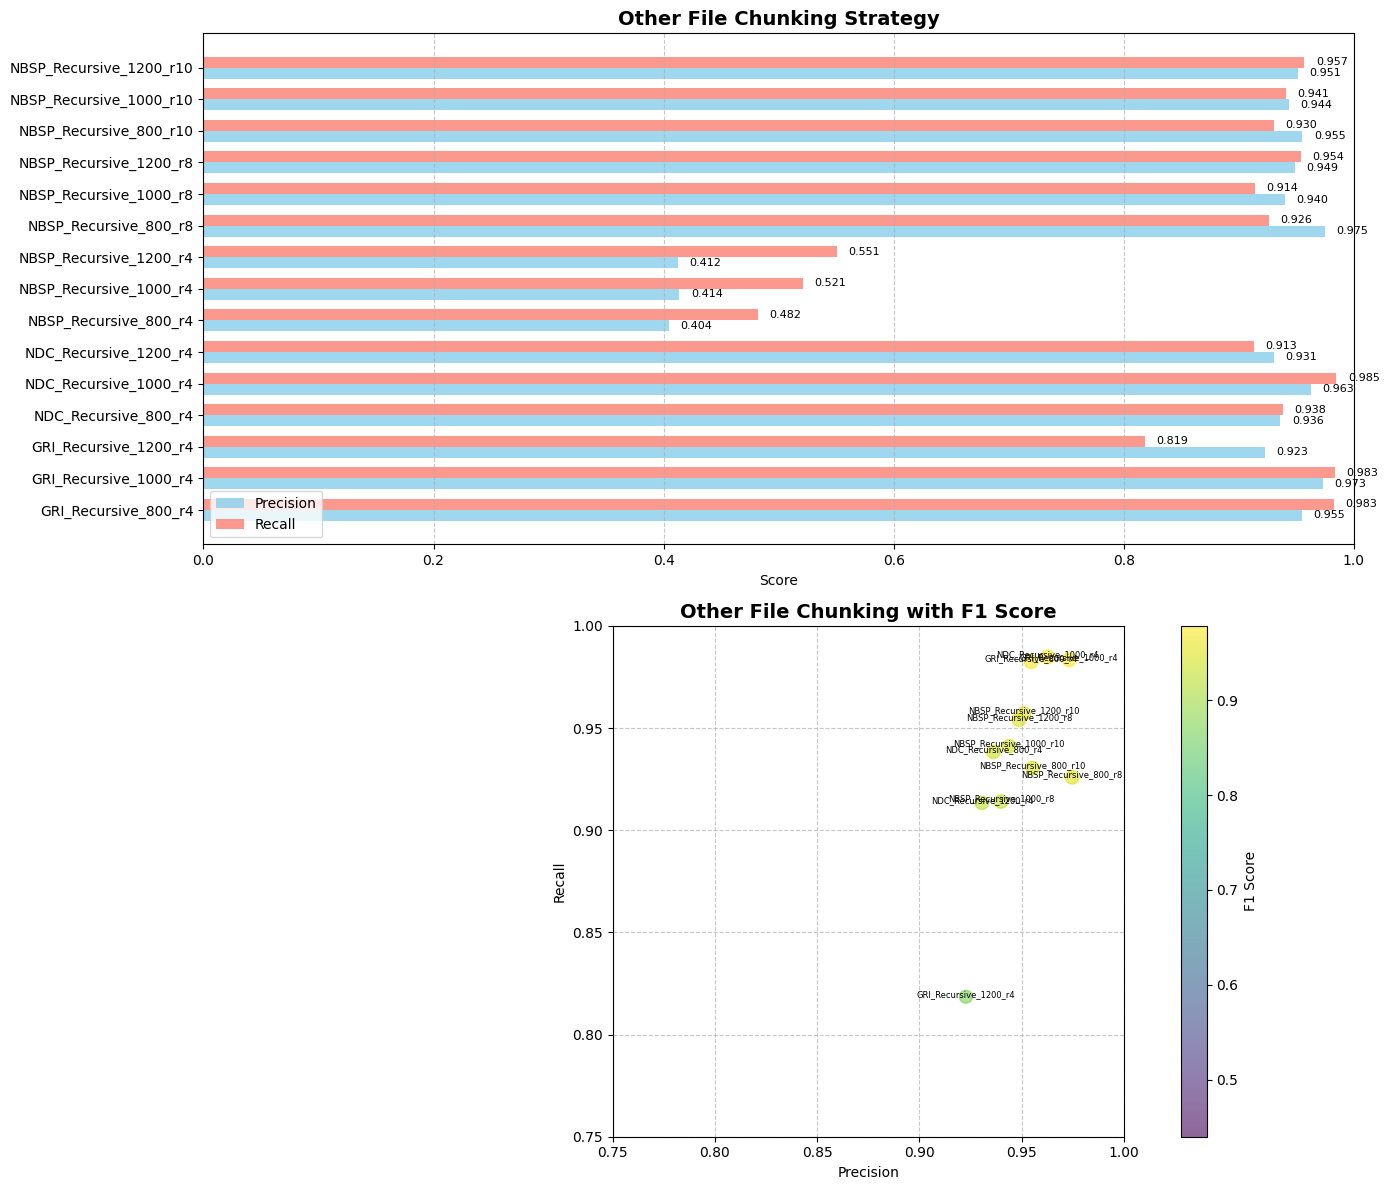

In [47]:
# Create DataFrame from the provided data
data = {
    'chunking_strategy': [
        # # 'RecursiveCharacterText_500_100',
        # 'RecursiveCharacterText_800_500',
        # # 'RecursiveCharacterText_800_100',
        # 'RecursiveCharacterText_1000_500',
        # # 'RecursiveCharacterText_1000_100',
        # 'RecursiveCharacterText_1200_500',
        # # 'RecursiveCharacterText_1200_100',
        # 'RecursiveCharacterText_1400_500',
        # 'RecursiveCharacterText_1200_500',
        # 'RecursiveCharacterText_1600_500',
        # 'semantic_percentile',
        # 'hybrid_chunking'
        "GRI_Recursive_800_r4",
        "GRI_Recursive_1000_r4",
        "GRI_Recursive_1200_r4",

        "NDC_Recursive_800_r4",
        "NDC_Recursive_1000_r4",
        "NDC_Recursive_1200_r4",

        
        "NBSP_Recursive_800_r4",
        "NBSP_Recursive_1000_r4",
        "NBSP_Recursive_1200_r4",
        "NBSP_Recursive_800_r8",
        "NBSP_Recursive_1000_r8",
        "NBSP_Recursive_1200_r8",
        "NBSP_Recursive_800_r10",
        "NBSP_Recursive_1000_r10",
        "NBSP_Recursive_1200_r10"
    ],
    'context_precision': [0.9547, 0.9733, 0.9228, 0.9362, 0.9627, 0.9306,    0.4044, 0.4137, 0.4122, 0.9748, 0.9399, 0.9488, 0.9554, 0.9439, 0.9511],
    'context_recall': [0.9825, 0.9834, 0.8185, 0.9383, 0.9848, 0.9134,    0.4822, 0.5211, 0.5506, 0.9259, 0.9140,0.9540, 0.9304, 0.9411, 0.9571]
}

df = pd.DataFrame(data)

# Calculate F1 score (harmonic mean of precision and recall)
df['f1_score'] = 2 * (df['context_precision'] * df['context_recall']) / (df['context_precision'] + df['context_recall'])

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Create a horizontal bar chart for precision and recall
bar_height = 0.35
y_pos = np.arange(len(df['chunking_strategy']))

# Plot precision bars
bars1 = ax1.barh(y_pos - bar_height/2, df['context_precision'], bar_height, 
                label='Precision', color='skyblue', alpha=0.8)
# Plot recall bars
bars2 = ax1.barh(y_pos + bar_height/2, df['context_recall'], bar_height,
                label='Recall', color='salmon', alpha=0.8)

# Add values to bars
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
             va='center', fontsize=8)
            
for bar in bars2:
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
             va='center', fontsize=8)

# # Add axis labels and title
ax1.set_xlabel('Score')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(df['chunking_strategy'])
ax1.set_title('Other File Chunking Strategy', fontsize=14, fontweight='bold')
ax1.legend(loc='lower left')
ax1.set_xlim(0, 1)
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Create a scatter plot for precision vs recall with F1 score represented by size
scatter = ax2.scatter(df['context_precision'], df['context_recall'], 
                     s=df['f1_score']*100,
                     alpha=0.6, 
                     c=df['f1_score'], 
                     cmap='viridis')

for i, txt in enumerate(df['chunking_strategy']):
    ax2.annotate(txt, (df['context_precision'][i], df['context_recall'][i]),
                fontsize=6, ha='center')

ax2.grid(True, linestyle='--', alpha=0.7)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('F1 Score')




ax2.set_xlabel('Precision')
ax2.set_ylabel('Recall')
ax2.set_title('Other File Chunking with F1 Score', fontsize=14, fontweight='bold')
ax2.set_xlim(0.75, 1)
ax2.set_ylim(0.75, 1)
ax2.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig("related_file_strategy_evaluate.png", dpi=300, bbox_inches='tight')
plt.show()